In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# New Section

## Reading Dataset

# New Section

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data=pd.read_csv("/content/Maintenance.csv")

data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [12]:
data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [13]:
data.shape

(10000, 14)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [15]:
data['Type'] = data['Type'].astype('category')

In [16]:
data.dtypes

UDI                           int64
Product ID                   object
Type                       category
Air temperature [K]         float64
Process temperature [K]     float64
Rotational speed [rpm]        int64
Torque [Nm]                 float64
Tool wear [min]               int64
Machine failure               int64
TWF                           int64
HDF                           int64
PWF                           int64
OSF                           int64
RNF                           int64
dtype: object

Checking Missing values

In [17]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

<Axes: >

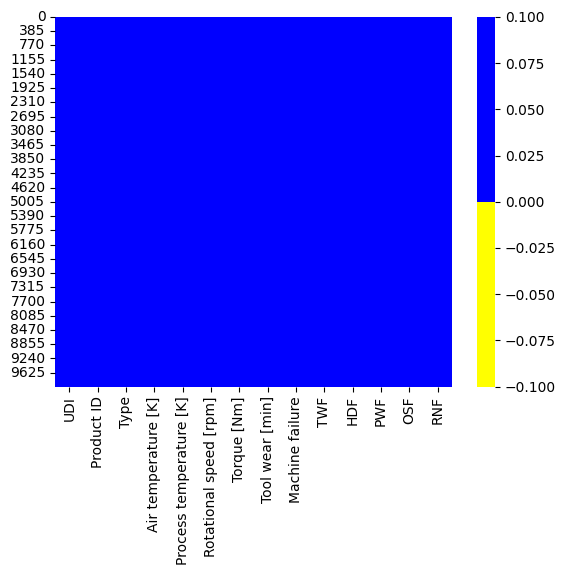

In [18]:
cols=data.columns
colour=['yellow', 'blue']
sns.heatmap(data[cols].isnull(),
           cmap=sns.color_palette(colour))

In [19]:
data.nunique(axis = 0)

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

**Type** here is have 3 categories (L, M,H)

In [20]:
data['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

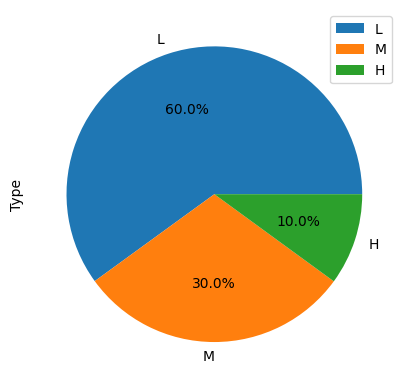

In [21]:
data['Type'].value_counts().plot(kind='pie',autopct='%01.01f%%')
plt.legend()

Lets check machine failure counts

In [22]:
data["Machine failure"].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

lets plot a pie chart for machine failure

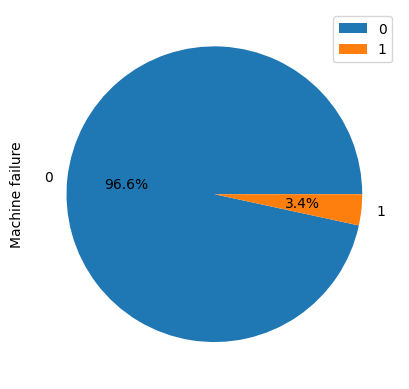

In [23]:
data['Machine failure'].value_counts().plot(kind='pie',autopct='%01.01f%%')
plt.legend()

similarly lets check counts for TWF,HDF,PWF,OSF,RNF

In [24]:
data['TWF'].value_counts()

0    9954
1      46
Name: TWF, dtype: int64

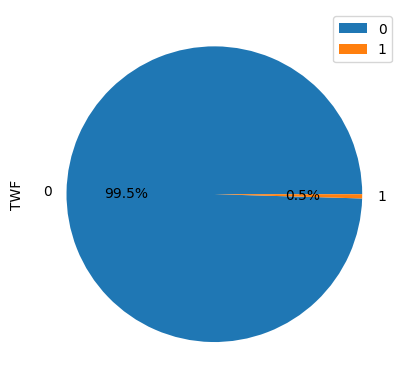

In [25]:
data['TWF'].value_counts().plot(kind='pie',autopct='%01.01f%%')
plt.legend()

In [26]:
data['HDF'].value_counts()

0    9885
1     115
Name: HDF, dtype: int64

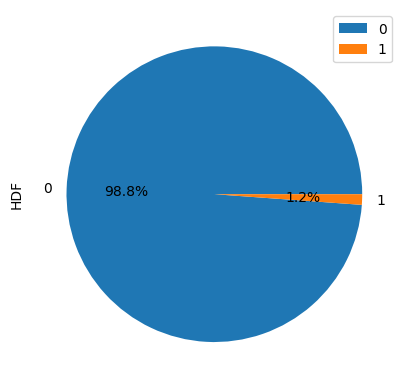

In [27]:
data['HDF'].value_counts().plot(kind='pie',autopct='%01.01f%%')
plt.legend()

In [28]:
data['PWF'].value_counts()

0    9905
1      95
Name: PWF, dtype: int64

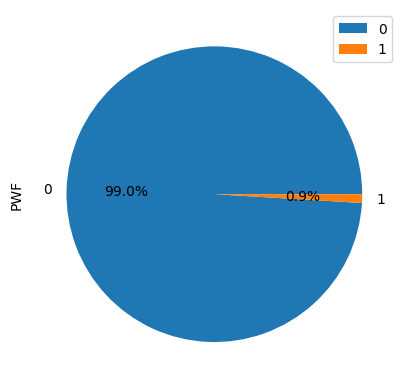

In [29]:
data['PWF'].value_counts().plot(kind='pie',autopct='%01.01f%%')
plt.legend()

In [30]:
data['OSF'].value_counts()

0    9902
1      98
Name: OSF, dtype: int64

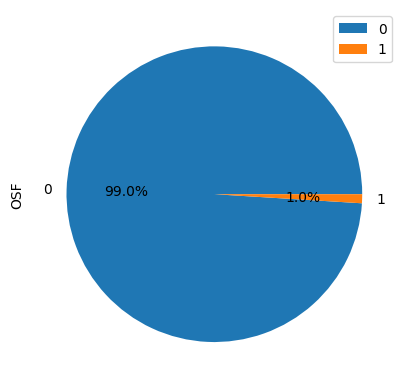

In [31]:
data['OSF'].value_counts().plot(kind='pie',autopct='%01.01f%%')
plt.legend()

In [32]:
data['RNF'].value_counts()

0    9981
1      19
Name: RNF, dtype: int64

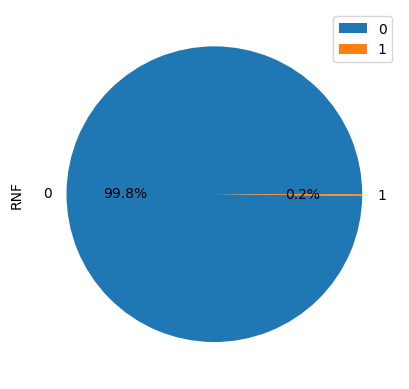

In [33]:
data['RNF'].value_counts().plot(kind='pie',autopct='%01.01f%%')
plt.legend()

In [34]:
# forming a dataframe of attributes that results in machine failure
info={'submodes':['TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],'failure':[46,95,115,98,19]}
submodes=pd.DataFrame(info)
submodes

submodes  failure
0      TWF       46
1      HDF       95
2      PWF      115
3      OSF       98
4      RNF       19

In [35]:
# checking for duplicated values
data[data.duplicated()].shape


(0, 14)

In [36]:
data.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [37]:
# copying the data
maintenance_data = data.copy

**Data Pre-Processing**

Data Type Conversion

In [38]:
# Transforming data with the help of label encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# df2 = pd.get_dummies(df, columns = ['Type'])

In [39]:
df = data
df.iloc[:, 2] = labelencoder.fit_transform(df.iloc[:, 2])
# d['Type'].replace({'H' : 0, 'L' : 1, 'M' : 2}, inplace = True) --- Alternate method
df.head()

UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860     2                298.1                    308.6   
1    2     L47181     1                298.2                    308.7   
2    3     L47182     1                298.1                    308.5   
3    4     L47183     1                298.2                    308.6   
4    5     L47184     1                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

Column Renaming

In [40]:
final_data = df.rename({'Air temperature [K]' : 'AT_K', 'Process temperature [K]' : 'PT_K', 'Rotational speed [rpm]' : 'RS_rpm',
                        'Torque [Nm]' : 'Torque', 'Tool wear [min]' : 'TW_min'}, axis = 1)

In [41]:
final_data.head()

UDI Product ID  Type   AT_K   PT_K  RS_rpm  Torque  TW_min  \
0    1     M14860     2  298.1  308.6    1551    42.8       0   
1    2     L47181     1  298.2  308.7    1408    46.3       3   
2    3     L47182     1  298.1  308.5    1498    49.4       5   
3    4     L47183     1  298.2  308.6    1433    39.5       7   
4    5     L47184     1  298.2  308.7    1408    40.0       9   

   Machine failure  TWF  HDF  PWF  OSF  RNF  
0                0    0    0    0    0    0  
1                0    0    0    0    0    0  
2                0    0    0    0    0    0  
3                0    0    0    0    0    0  
4                0    0    0    0    0    0

**Data visualisation**

Pair Plot

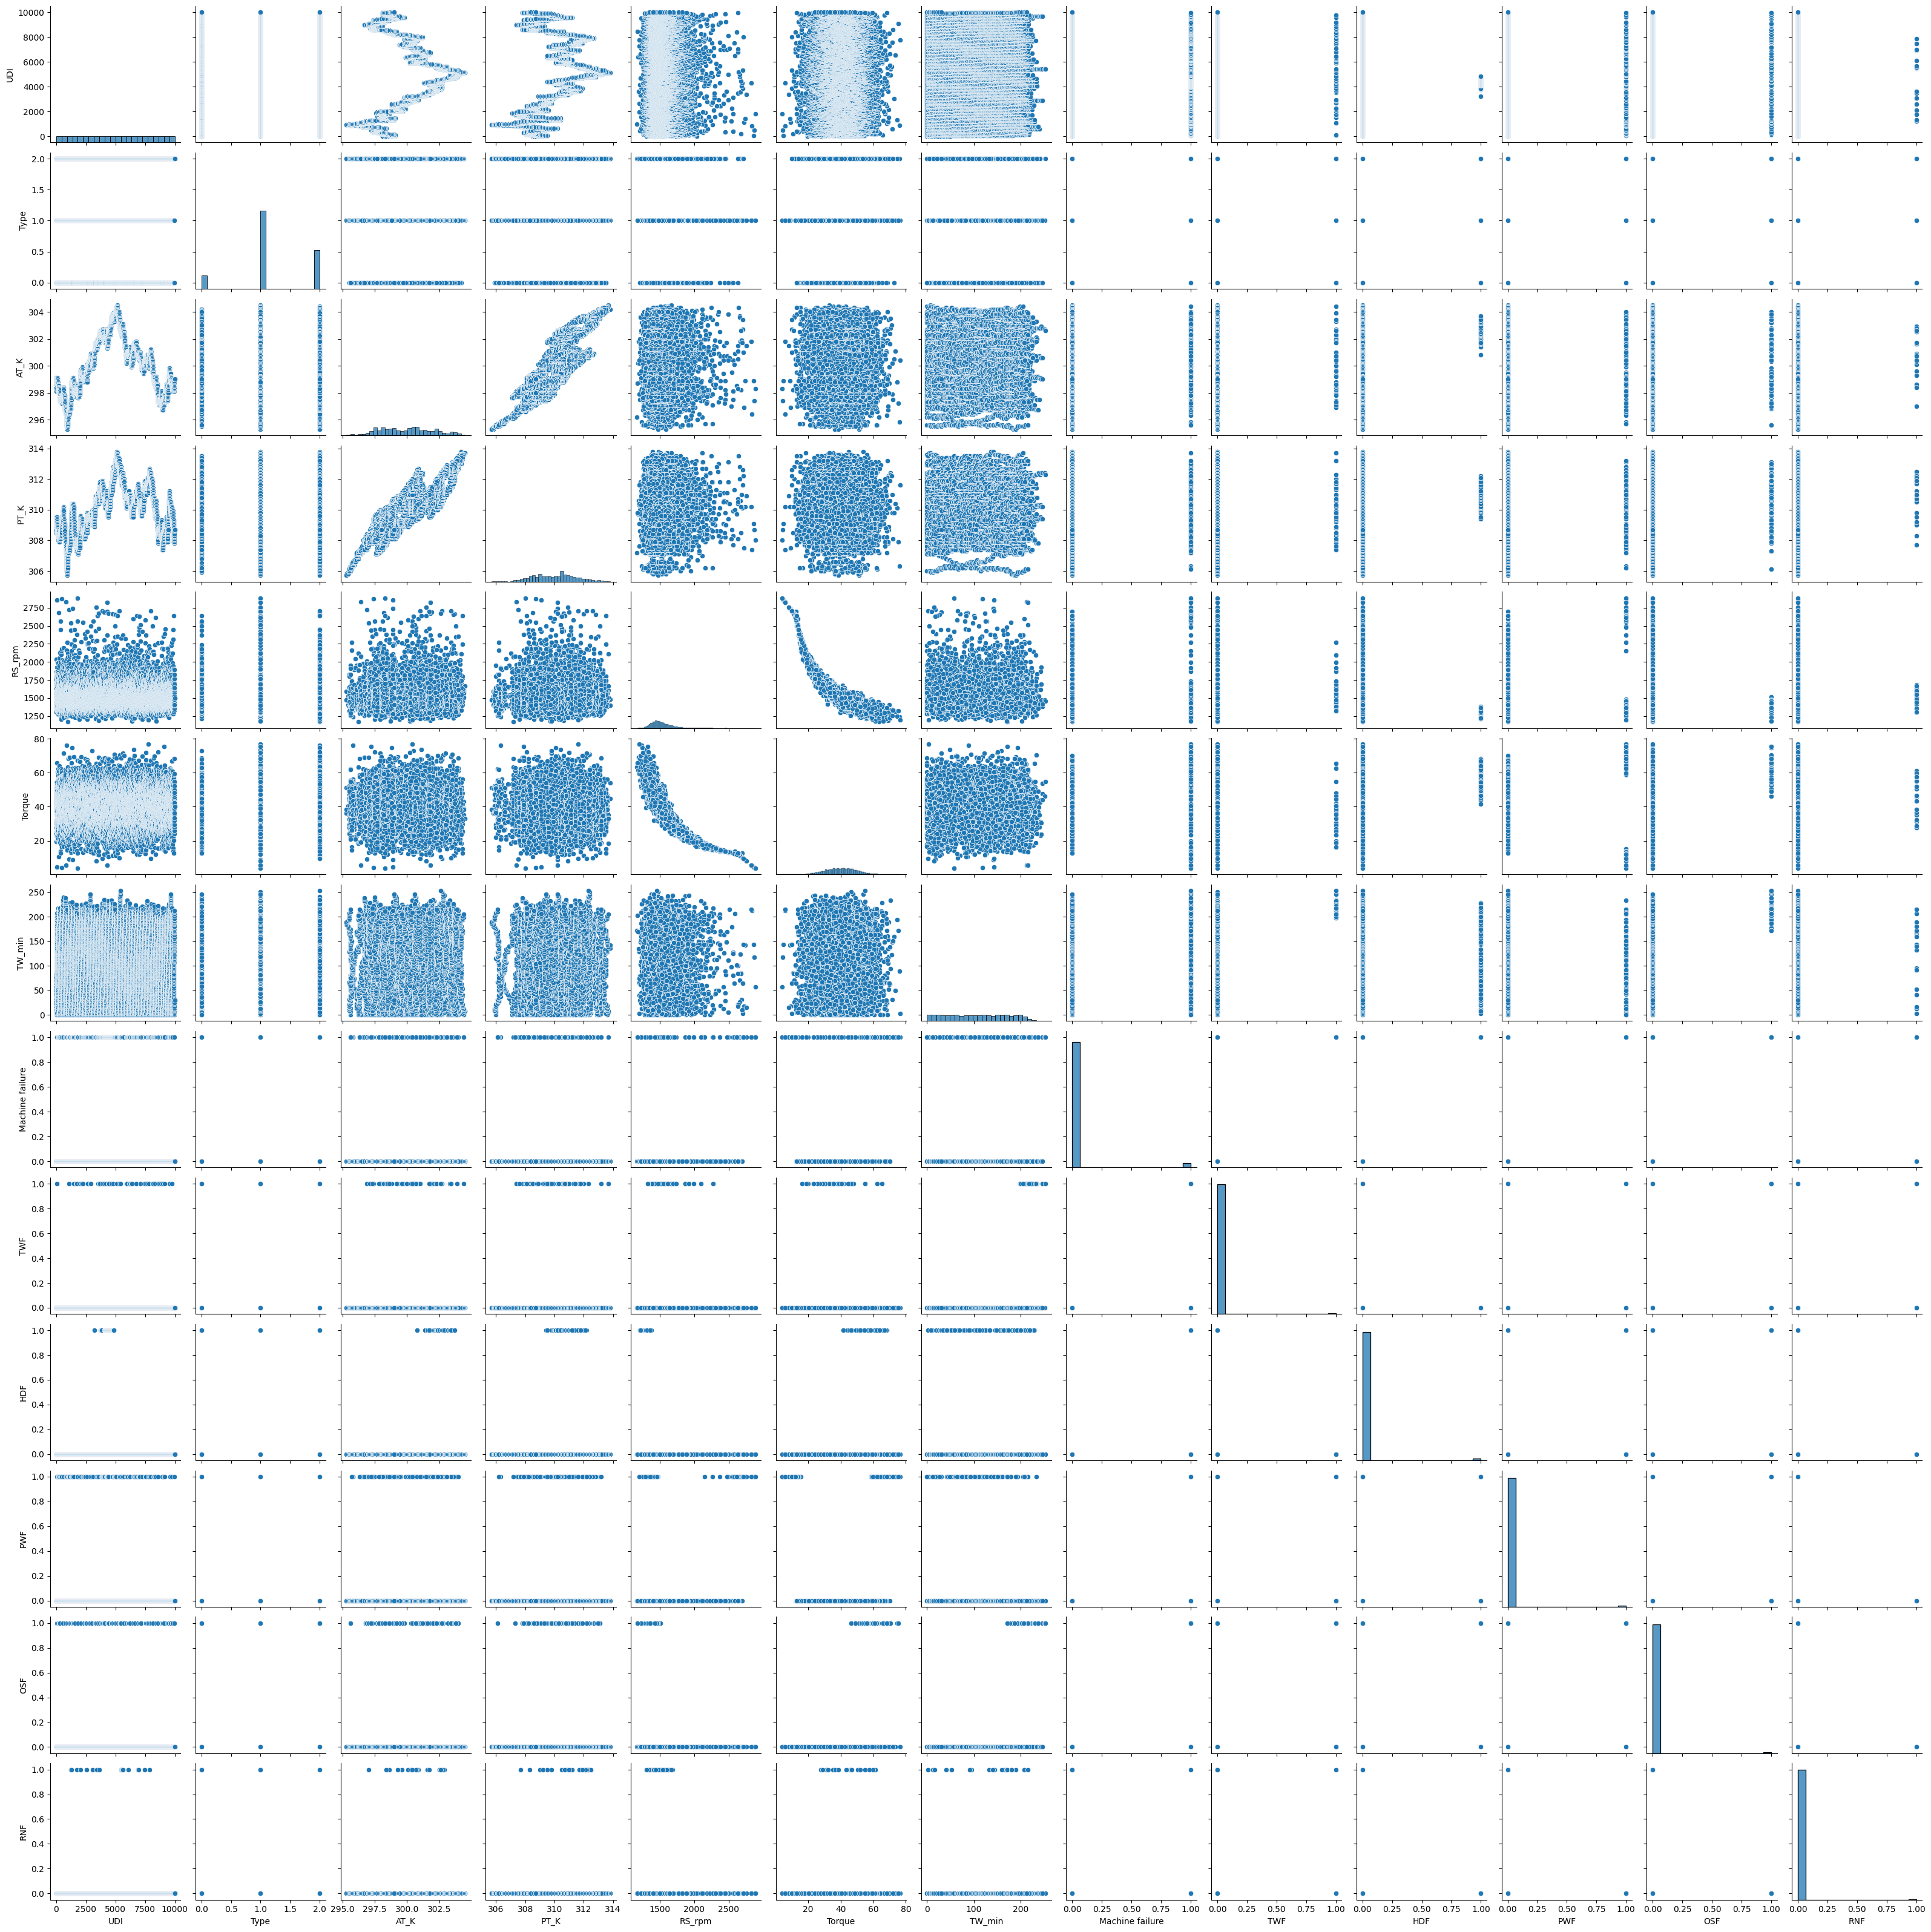

In [42]:
sns.pairplot(final_data)

In [43]:
final_data.iloc[:, 2 : 9].corr()

Type      AT_K      PT_K    RS_rpm    Torque    TW_min  \
Type             1.000000  0.017599  0.013444 -0.002693  0.004011 -0.003930   
AT_K             0.017599  1.000000  0.876107  0.022670 -0.013778  0.013853   
PT_K             0.013444  0.876107  1.000000  0.019277 -0.014061  0.013488   
RS_rpm          -0.002693  0.022670  0.019277  1.000000 -0.875027  0.000223   
Torque           0.004011 -0.013778 -0.014061 -0.875027  1.000000 -0.003093   
TW_min          -0.003930  0.013853  0.013488  0.000223 -0.003093  1.000000   
Machine failure -0.005152  0.082556  0.035946 -0.044188  0.191321  0.105448   

                 Machine failure  
Type                   -0.005152  
AT_K                    0.082556  
PT_K                    0.035946  
RS_rpm                 -0.044188  
Torque                  0.191321  
TW_min                  0.105448  
Machine failure         1.000000

Heat Map

<Axes: >

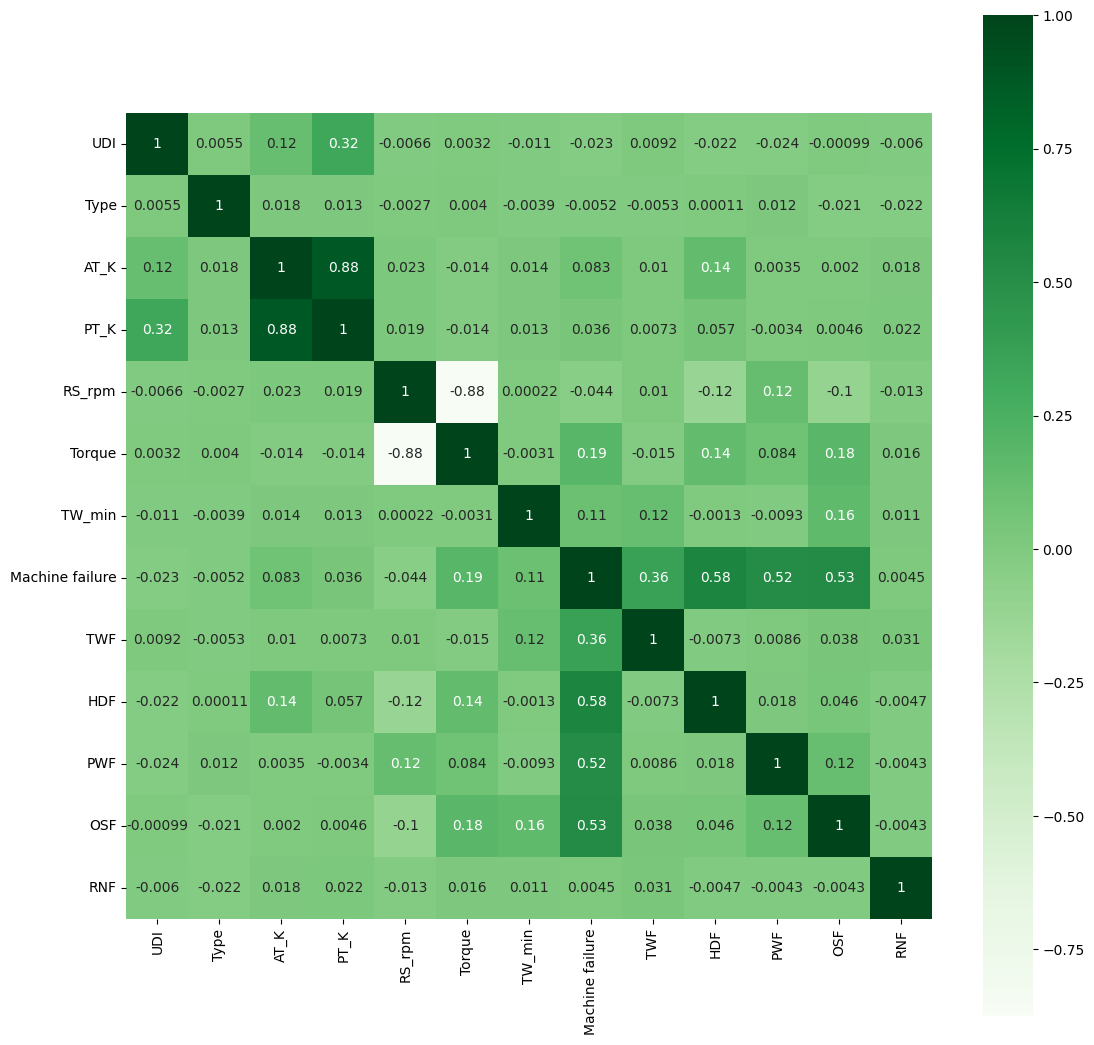

In [44]:
correlation = final_data.corr()
plt.figure(figsize = (13, 13))
sns.heatmap(correlation, annot = True, cbar = True, square = True, cmap = 'Greens')

<Axes: >

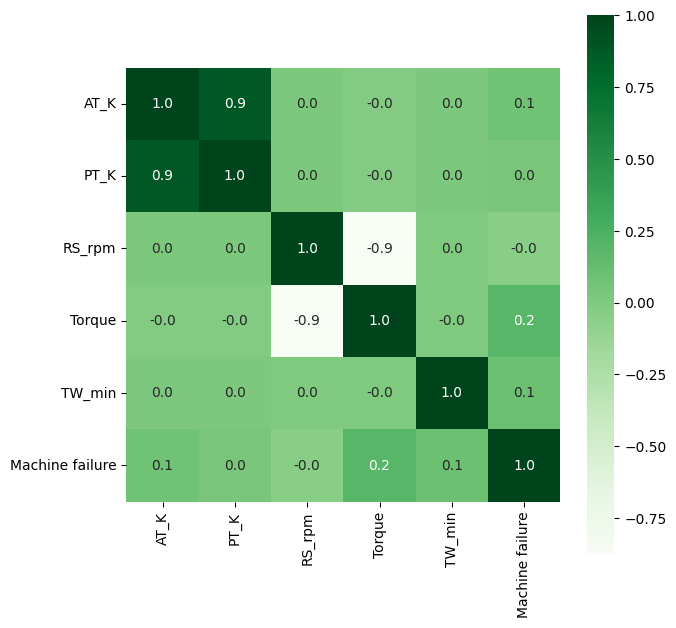

In [45]:
correlation = final_data.corr()
plt.figure(figsize = (7, 7))
sns.heatmap(correlation.iloc[2:8,2:8], annot = True, cbar = True, square = True, cmap = 'Greens', fmt = '.1f')

<Axes: >

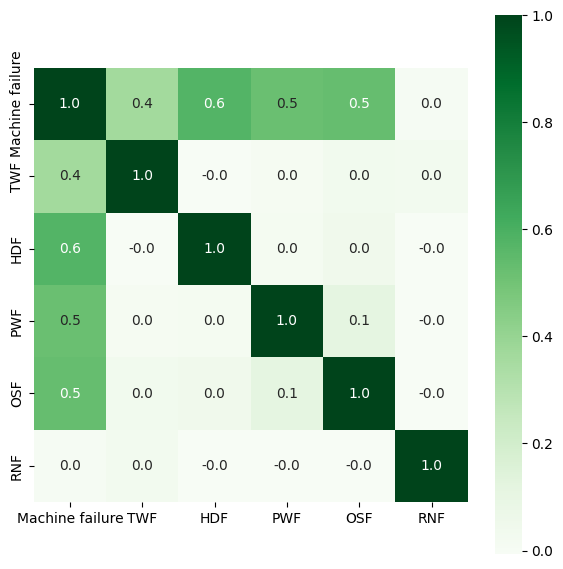

In [46]:
correlation = final_data.corr()
plt.figure(figsize = (7, 7))
sns.heatmap(correlation.iloc[7:,7:], annot = True, cbar = True, square = True, cmap = 'Greens', fmt = '.1f')

**Box plots for failure rates**

<Axes: xlabel='Machine failure', ylabel='Torque'>

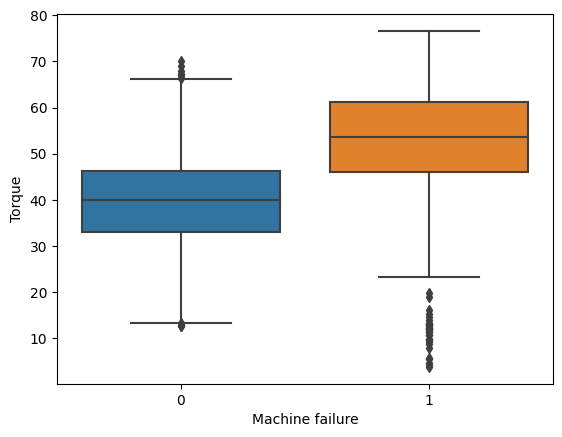

In [47]:
sns.boxplot(x="Machine failure",y="Torque",data=final_data)

<Axes: xlabel='Machine failure', ylabel='TW_min'>

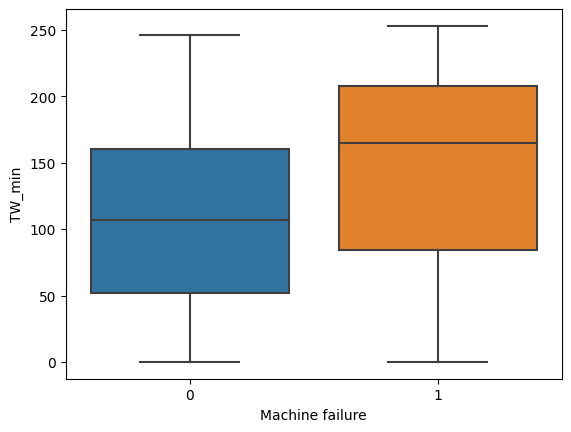

In [48]:
sns.boxplot(x="Machine failure",y="TW_min",data=final_data)

<Axes: xlabel='TWF', ylabel='TW_min'>

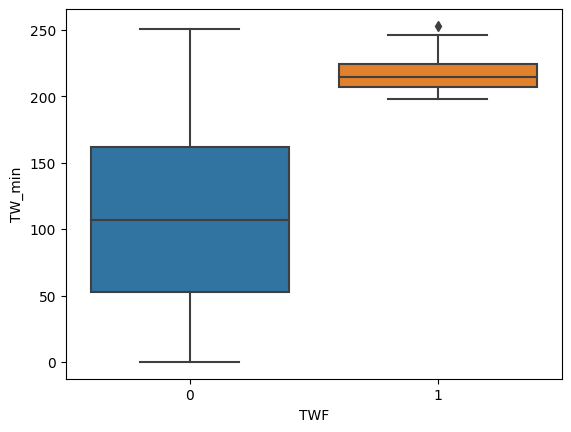

In [49]:
sns.boxplot(x="TWF",y="TW_min",data = final_data)

<Axes: xlabel='OSF', ylabel='TW_min'>

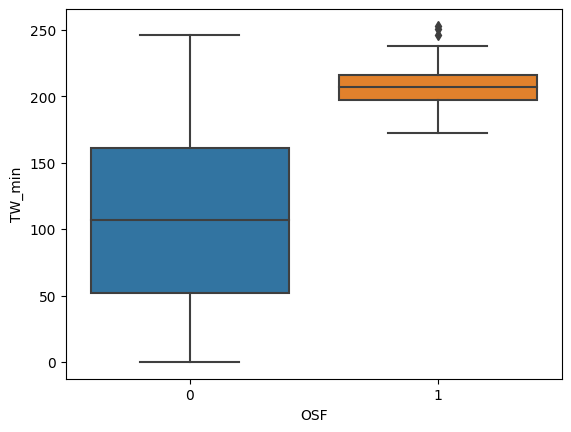

In [50]:
sns.boxplot(x="OSF",y="TW_min",data = final_data)

<Axes: xlabel='OSF', ylabel='Torque'>

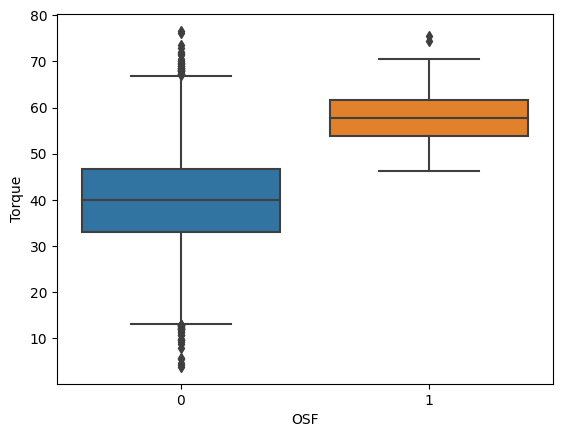

In [51]:
sns.boxplot(x="OSF",y="Torque",data=final_data)

<Axes: xlabel='HDF', ylabel='AT_K'>

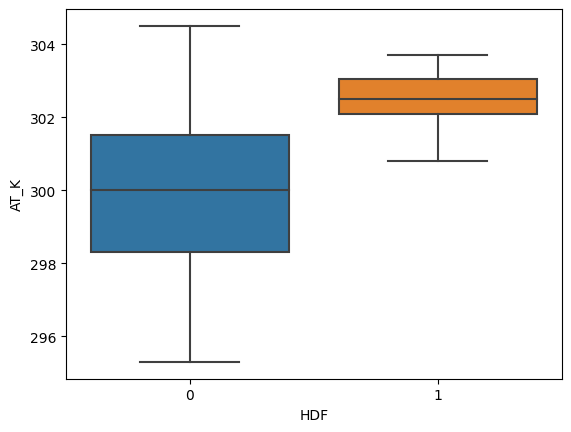

In [52]:
sns.boxplot(x="HDF",y="AT_K",data=final_data)

<Axes: xlabel='HDF', ylabel='Torque'>

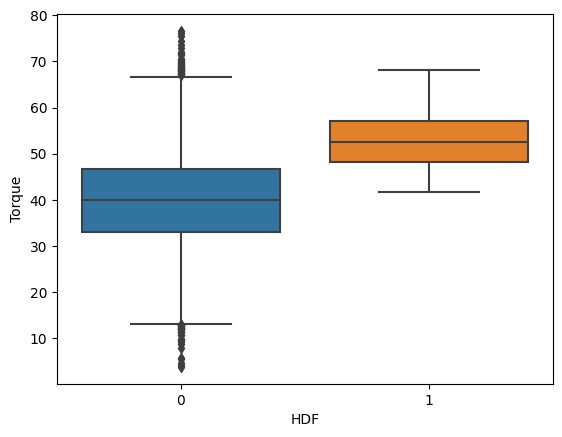

In [53]:
sns.boxplot(x="HDF",y="Torque",data=final_data)

**Automated EDA report:**

In [54]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 23.7 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


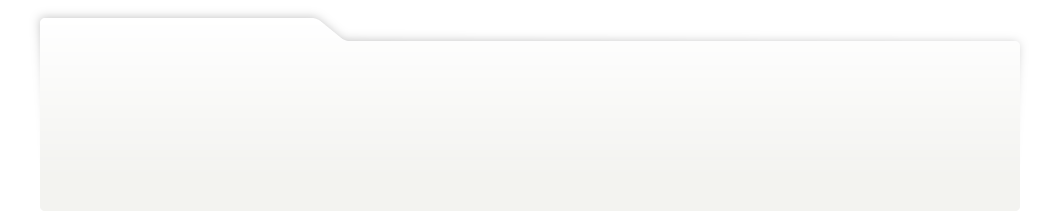
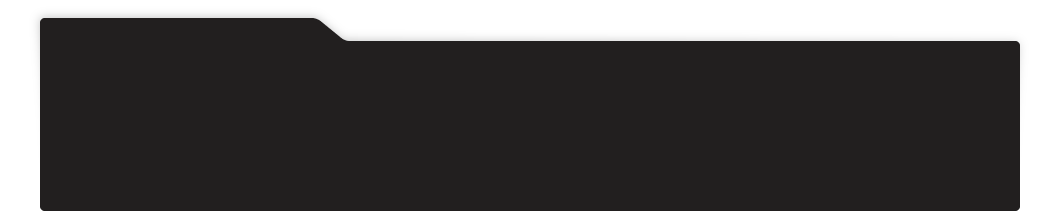
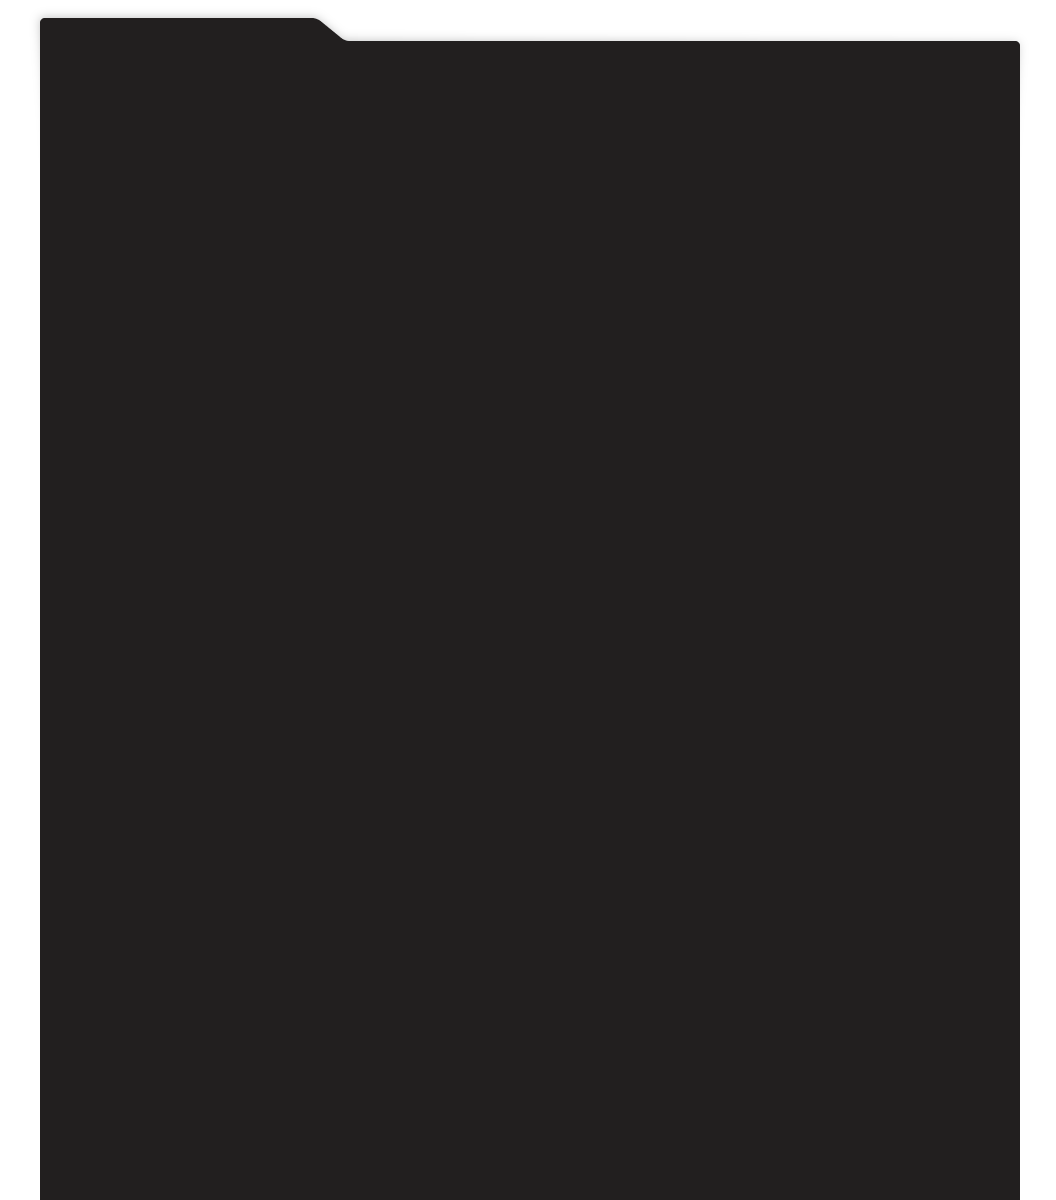
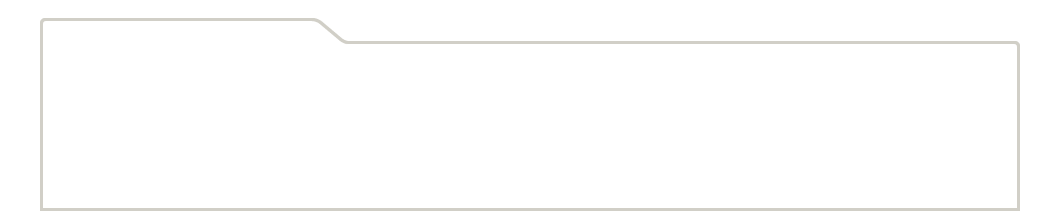
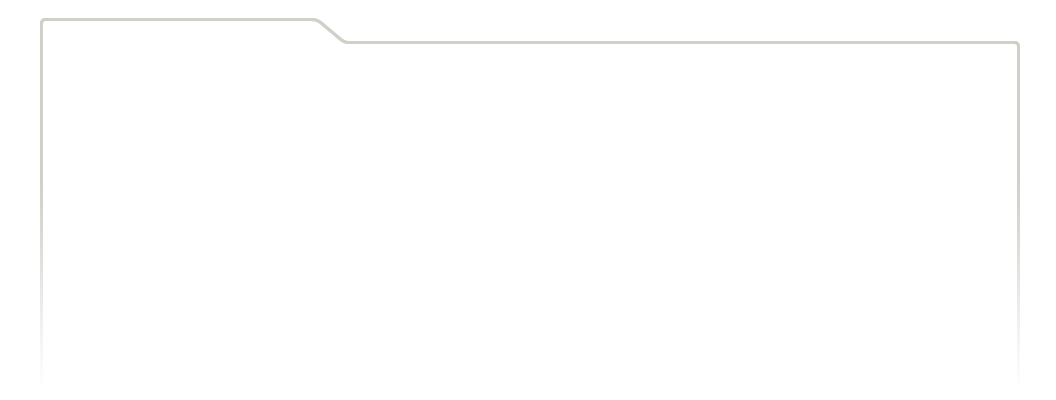
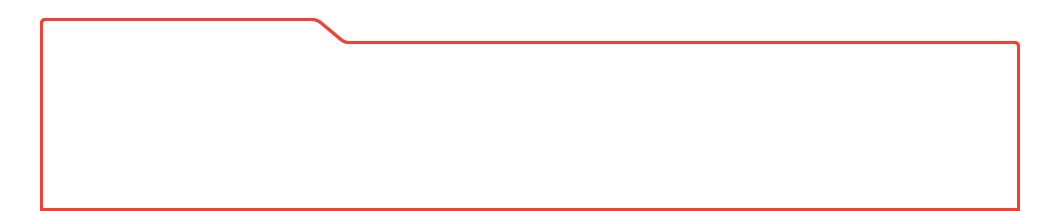
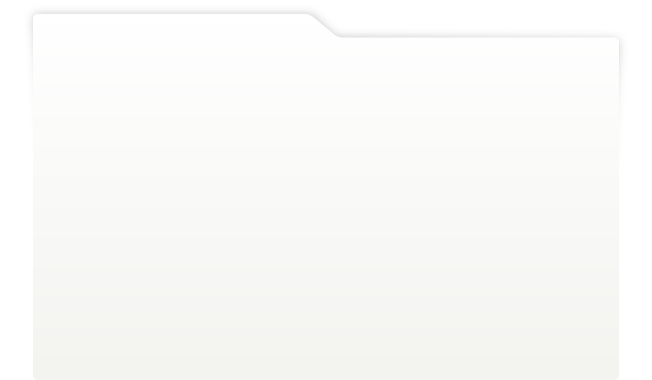
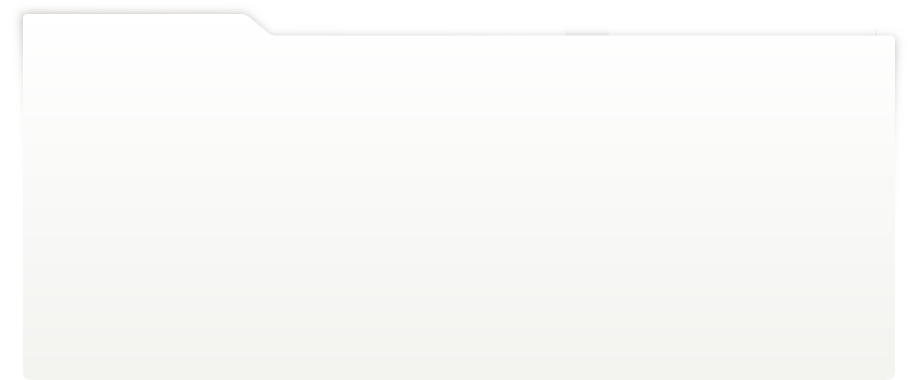
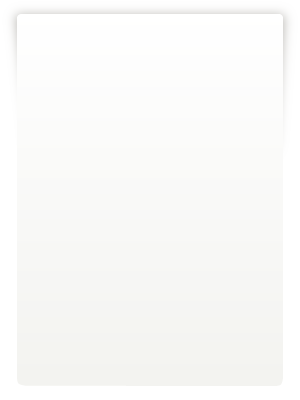
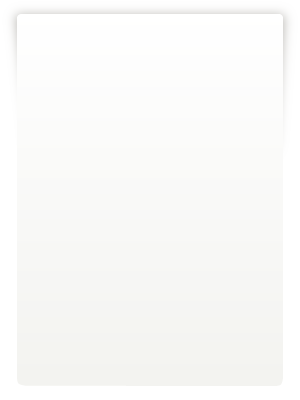
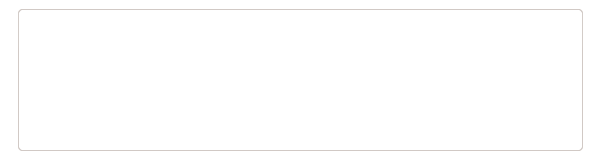
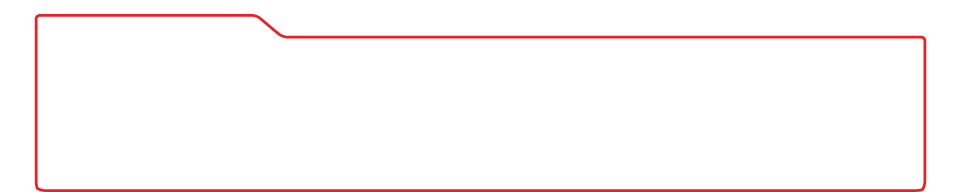
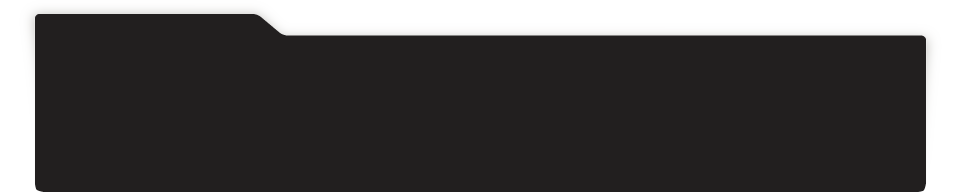
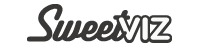
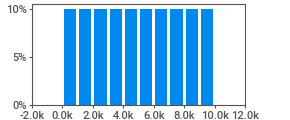
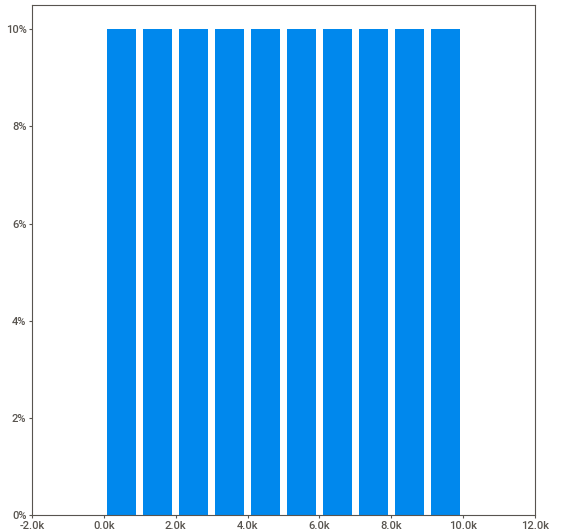
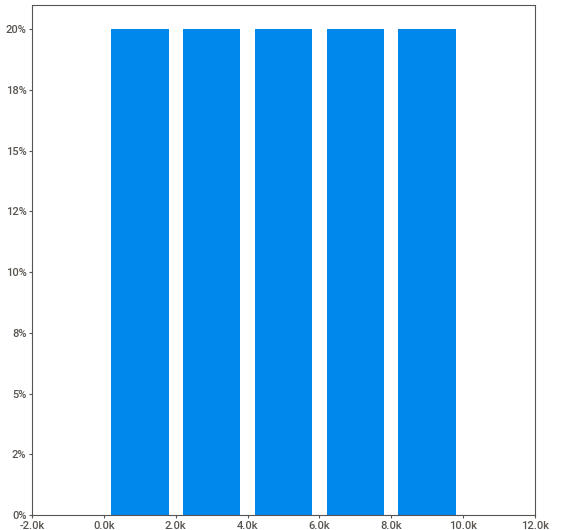
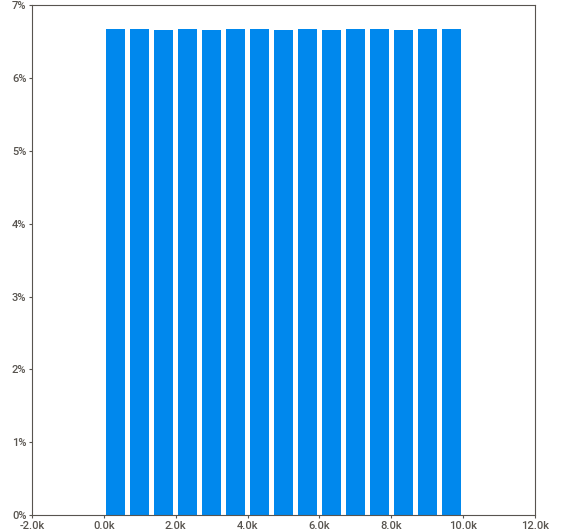
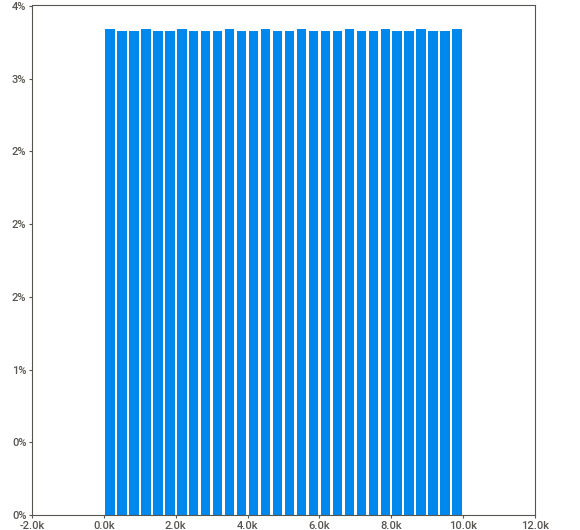
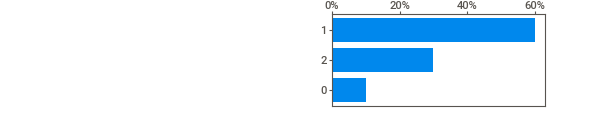
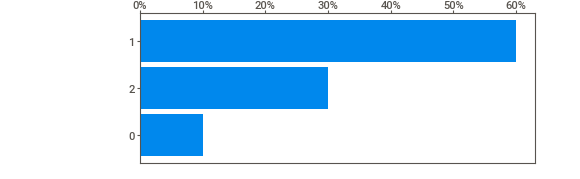
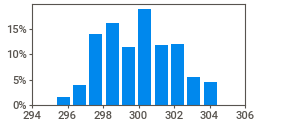
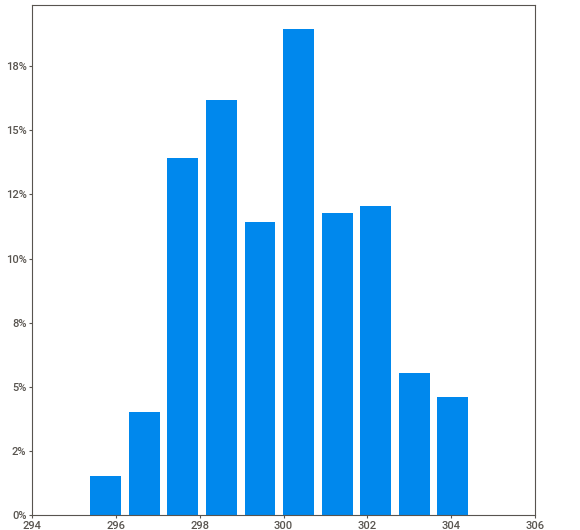
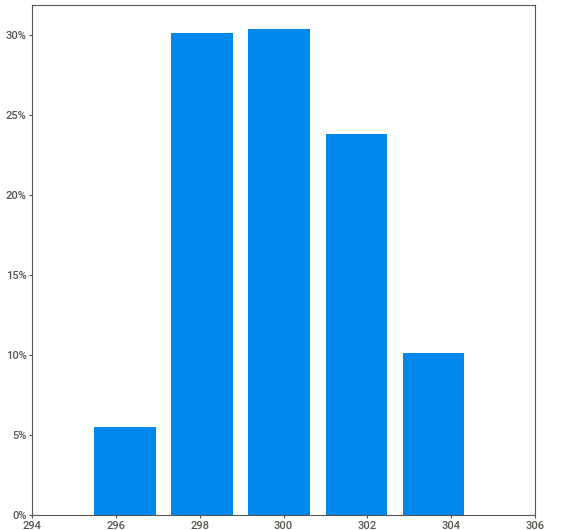
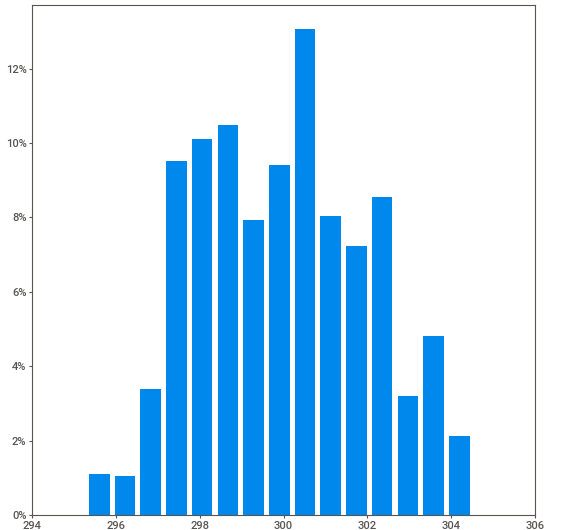
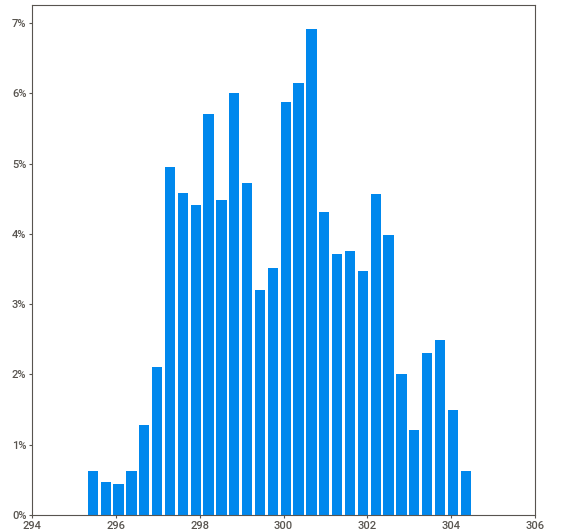
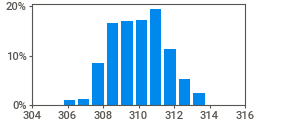
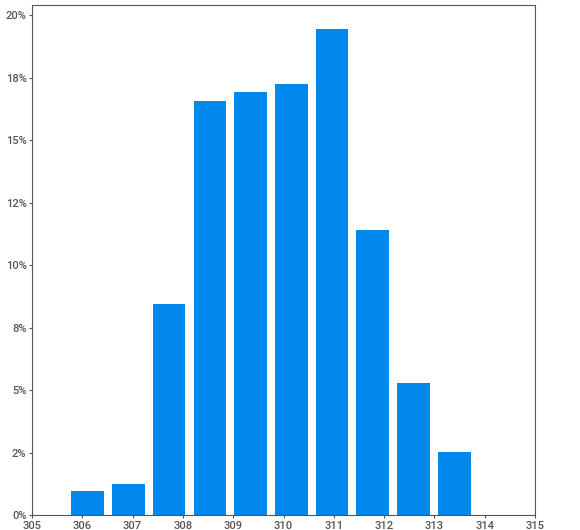
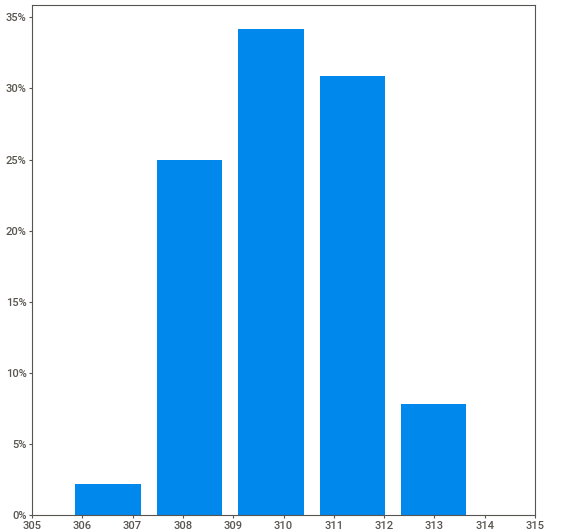
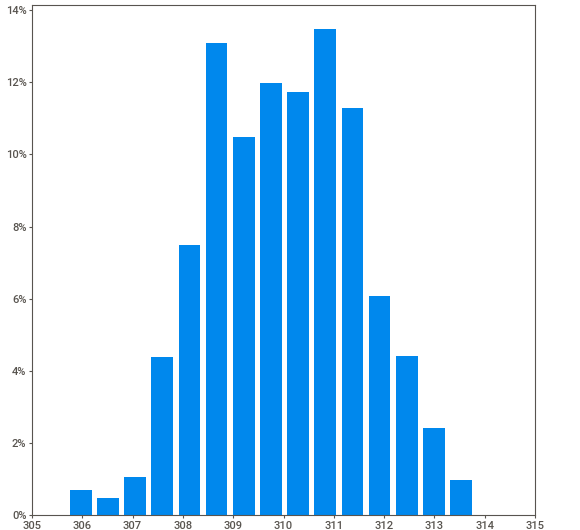
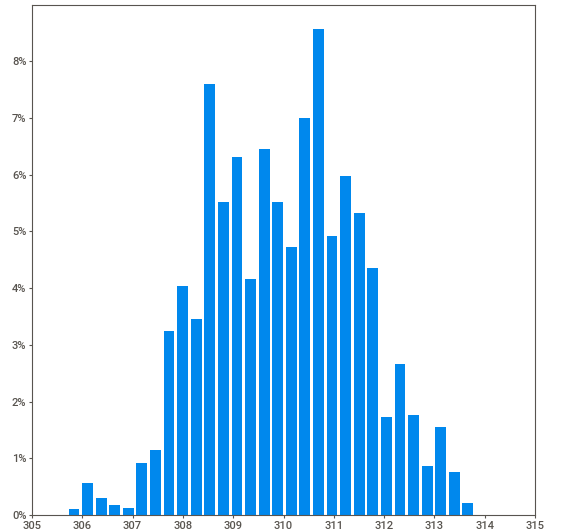
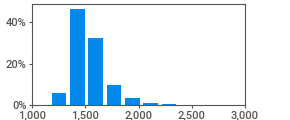
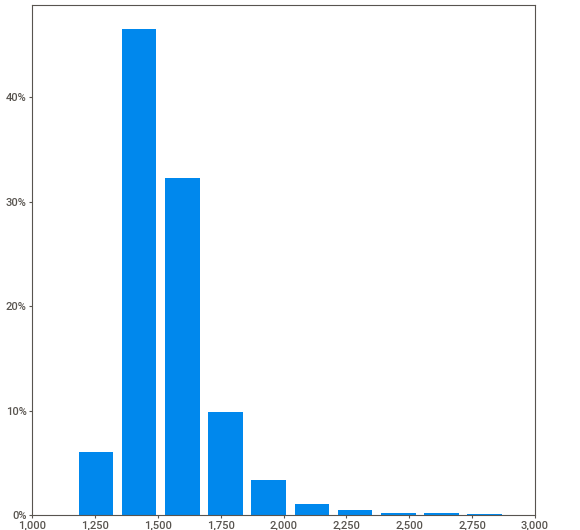
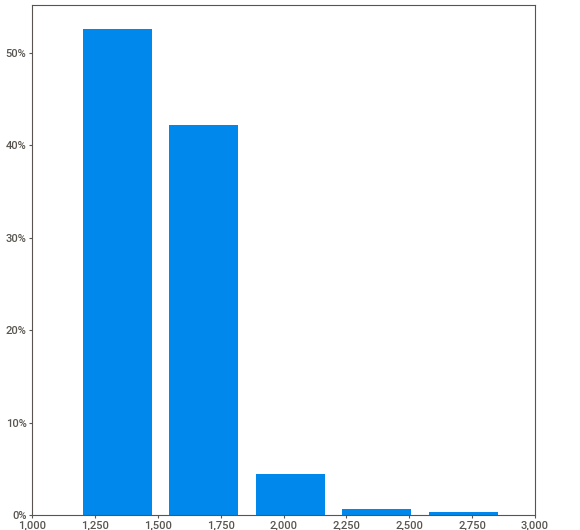
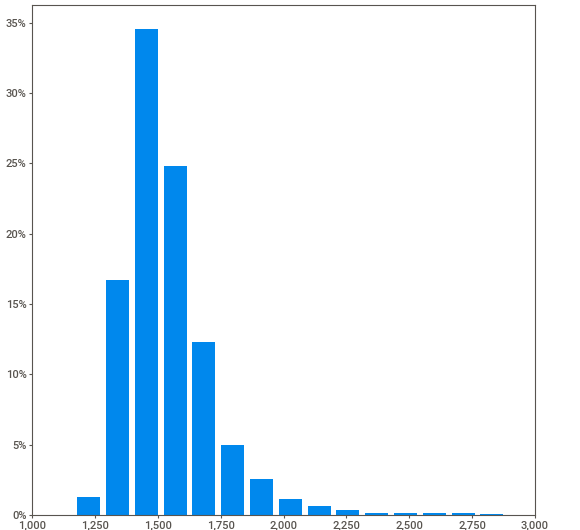
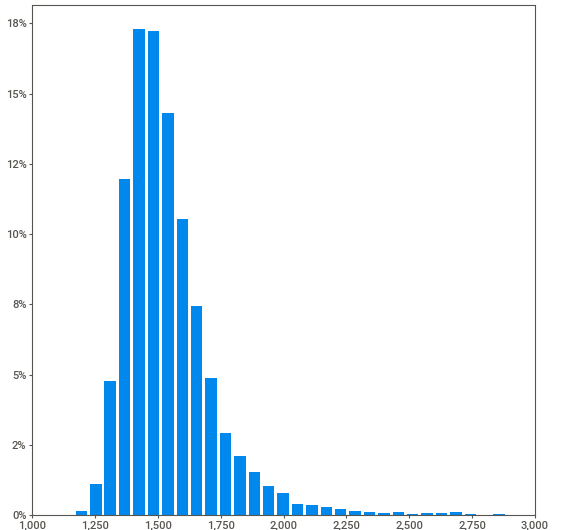
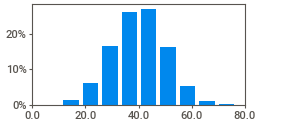
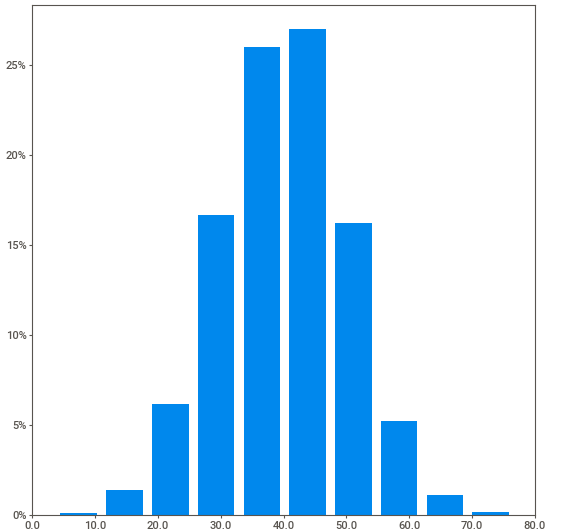
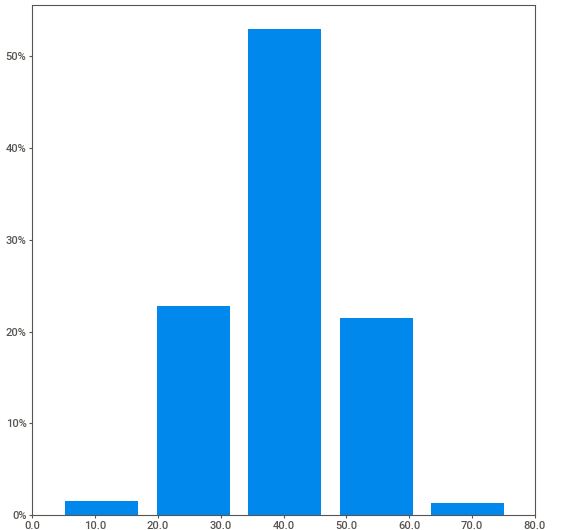
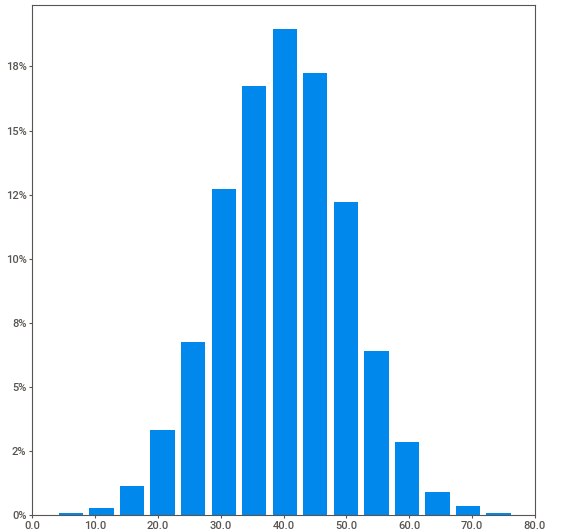
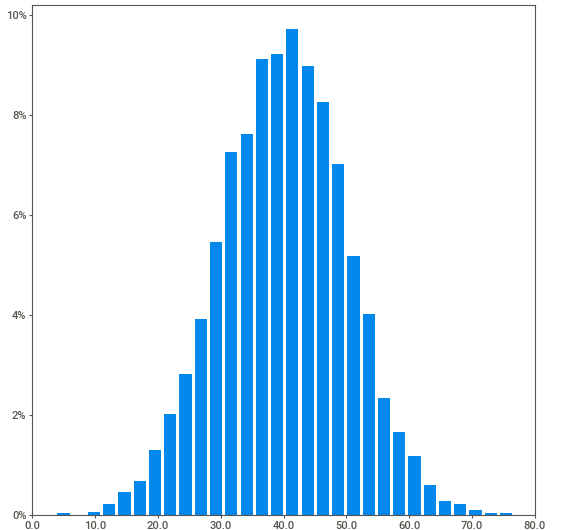
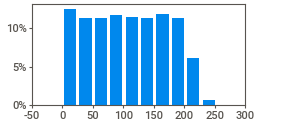
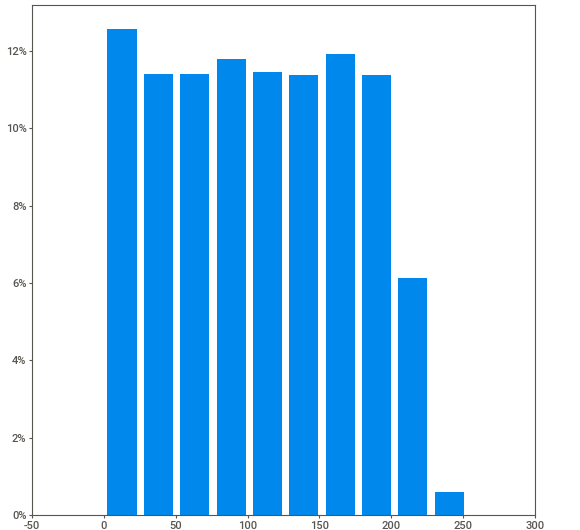
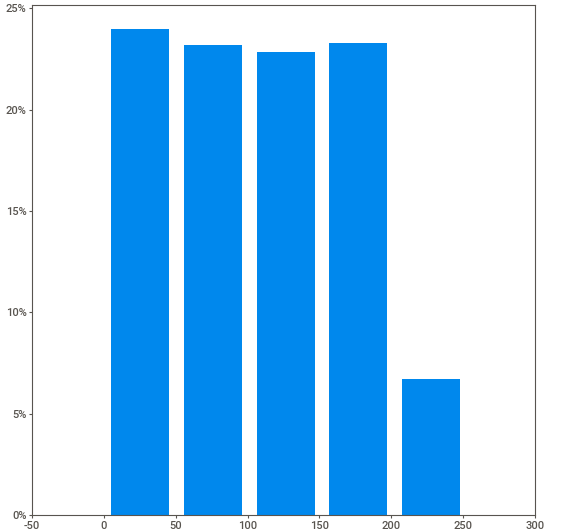
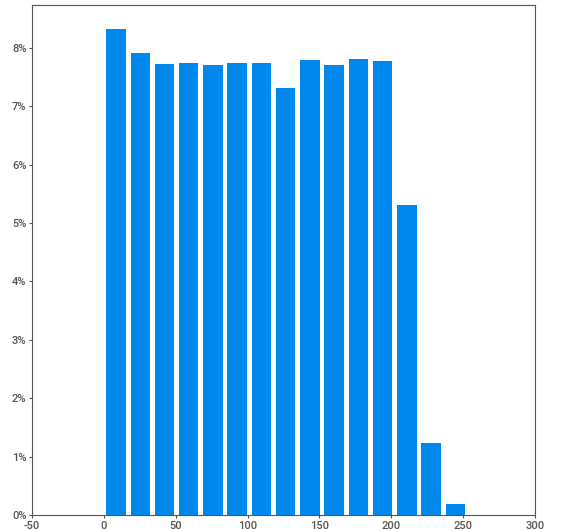
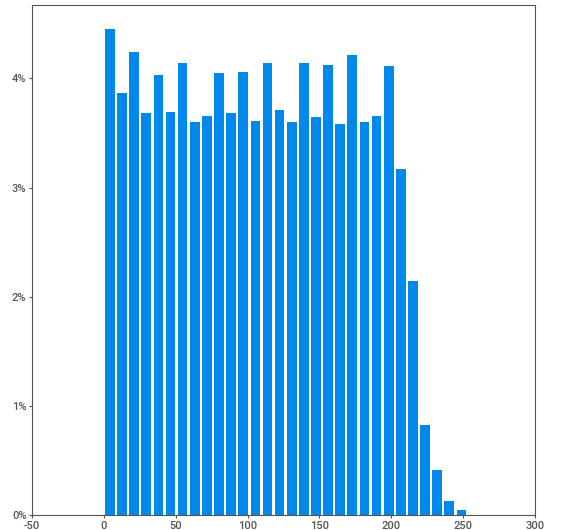
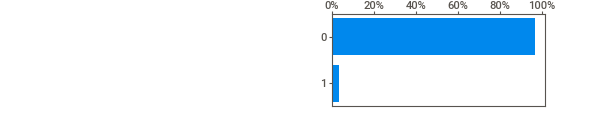
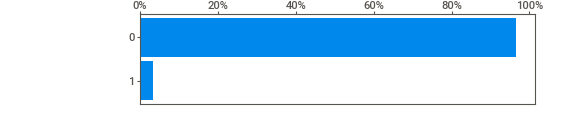
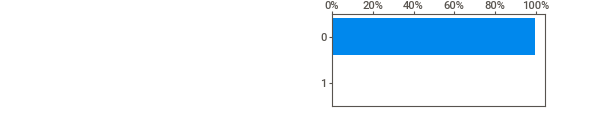
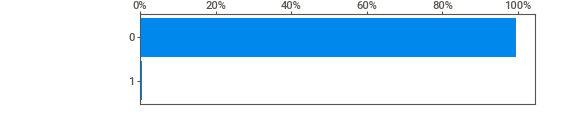
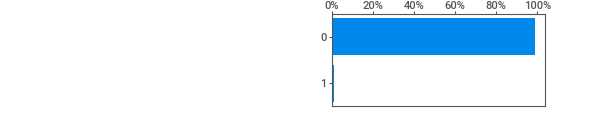
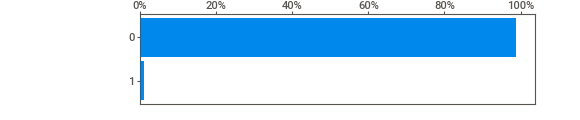
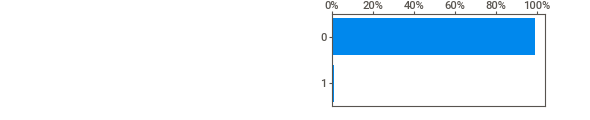
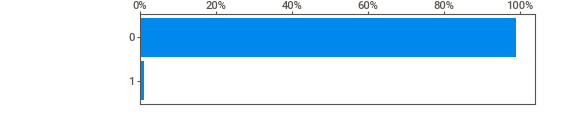
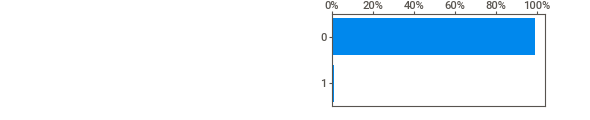
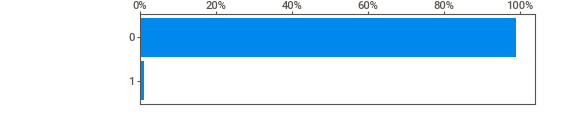
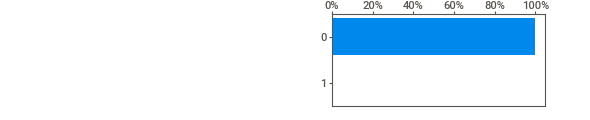
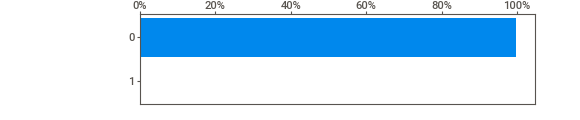
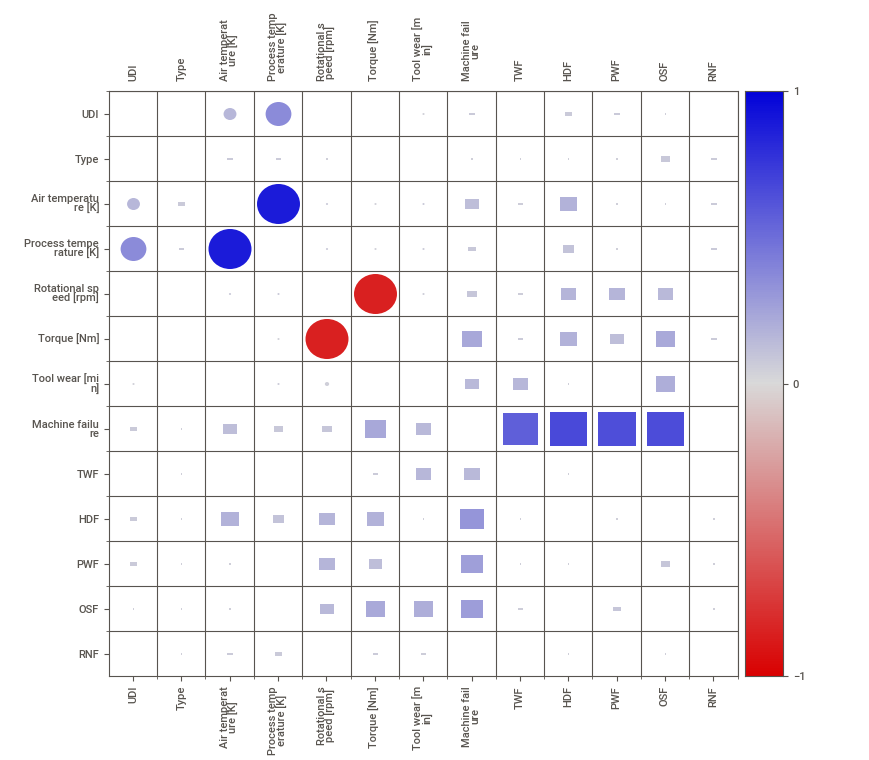
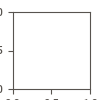

Report maintenance_data (1)_SV_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [55]:
# 2. Using Sweetviz
import sweetviz as sv
sweet_report=sv.analyze(data)
sweet_report.show_notebook()
sweet_report.show_html('maintenance_data (1)_SV_Report.html')

**Feature Enginering**

Outlier Detection

In [56]:
final_data.columns

Index(['UDI', 'Product ID', 'Type', 'AT_K', 'PT_K', 'RS_rpm', 'Torque',
       'TW_min', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

**Box Plot**

Checking for outliers

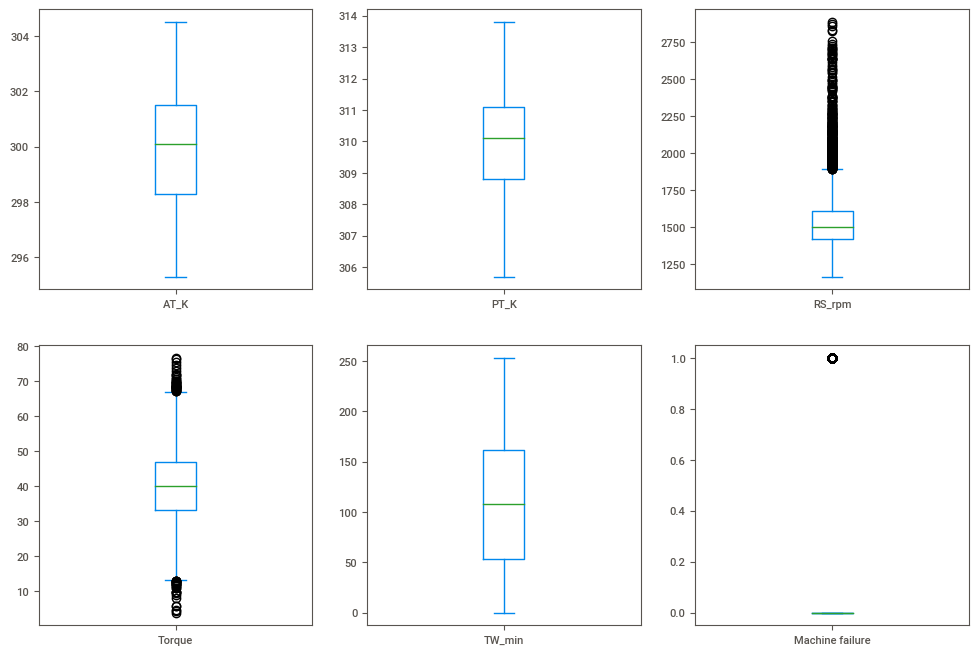

In [57]:
col = final_data[['AT_K', 'PT_K', 'RS_rpm', 'Torque', 'TW_min', 'Machine failure']]
col.plot(figsize=(12,8),kind='box', subplots=True, layout=(2,3))
plt.show()

**Histogram**

Checking the distribution of each attribute

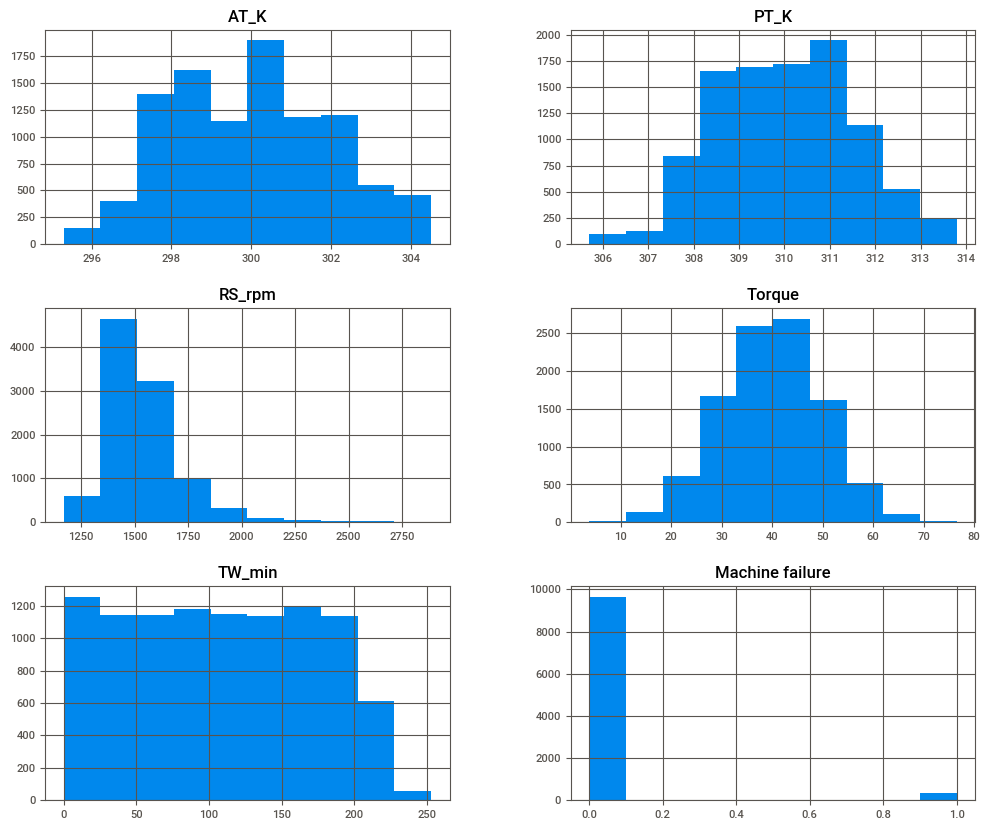

In [58]:
col.hist(figsize=(12, 10))
plt.show()

**Univariate Density Plot**

Checking the shape of the curve i.e. Bell Curve or Gaussian curve

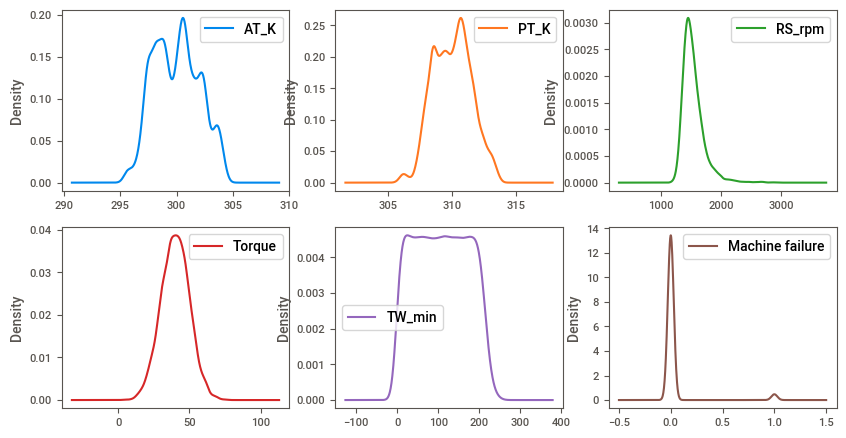

In [59]:
col.plot(kind='density',subplots=True, layout=(3,3), sharex=False, figsize = (10,8))
plt.show()

In [60]:
final_data["Torque"].describe()

count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque, dtype: float64

**Using Z-score :-**


Formula for Z-score = (Observation - mean)/ Standard deviation

z = (X - mu)/ sigma

In [61]:
outliers = []
def detect_outliers(data) :
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data :
        z_score = (i - mean)/std
        if np.abs(z_score > threshold) :
            outliers.append(i)
    return outliers

In [62]:
outliers_pt = detect_outliers(final_data['Torque'])
print(len(outliers_pt),'\n',outliers_pt)

14 
 [71.6, 76.2, 74.5, 72.8, 70.6, 70.5, 71.3, 70.0, 73.6, 70.0, 71.8, 76.6, 72.0, 75.4]


**Using Inter Quantile Range**

Q1 = 25th percentile

Q3 = 75th percentile

IQR = Q3 - Q1

Upper limit = Q1 * 1.5

lower limit = Q3 * 1.5

Anything that lies above and below upper quantile and lower quantile respectively is an outlier




In [63]:
def plotvariable(df, variable):

    plt.subplot(1,2,1)
    plt.hist(df[variable], alpha = 0.5)

    plt.subplot(1,2,2)
    plt.boxplot(df[variable])
    plt.show()

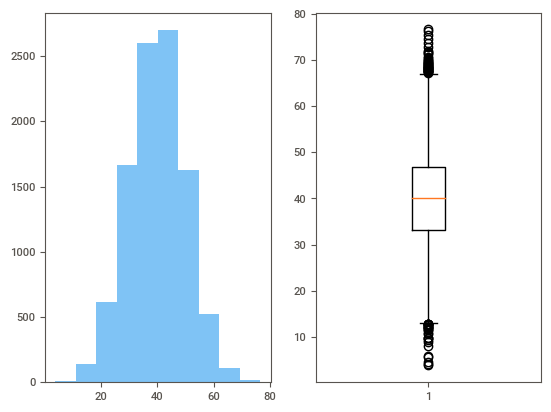

In [64]:
plotvariable(final_data, 'Torque')

In [65]:
def find_boundaries(df, variables) :

    Q1 = df[variables].quantile(.25)
    Q3 = df[variables].quantile(.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5*IQR
    upper_boundary = Q3 + 1.5*IQR

    return lower_boundary, upper_boundary

In [66]:
lower_torque, upper_torque = find_boundaries(final_data, 'Torque')
print('upper limit for torque is : ', upper_torque)
print('lower limit for torque is : ', lower_torque)

upper limit for torque is :  67.19999999999999
lower limit for torque is :  12.800000000000011


**Removing the Outliers**

dropping the outliers

In [67]:
outliers_torque = np.where(final_data['Torque'] > upper_torque, True,
                          np.where(final_data['Torque'] < lower_torque, True, False))

In [68]:
outliers_torque

array([False, False, False, ..., False, False, False])

In [69]:
eng_data = final_data.loc[~(outliers_torque),]

In [70]:
print(final_data.shape)
print(eng_data.shape)

(10000, 14)
(9931, 14)


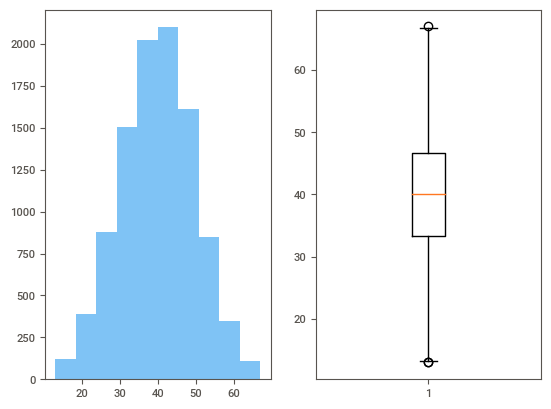

In [71]:
plotvariable(eng_data, 'Torque')

**capping variables at upper and lower limit**

In this instead of dropping we replace the outliers with the maximum and min values

In [72]:
final_data['Torque'] =  np.where(final_data['Torque'] > upper_torque, upper_torque,
                          np.where(final_data['Torque'] < lower_torque, lower_torque, final_data['Torque']))

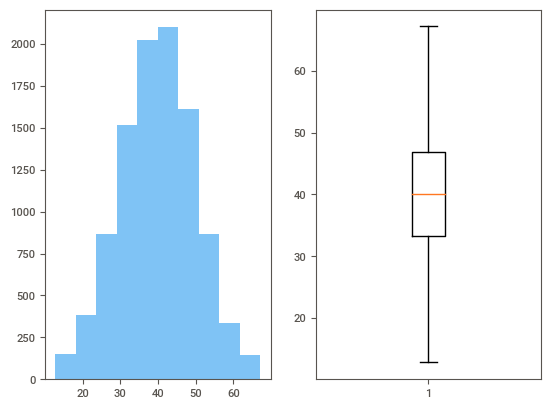

In [73]:
plotvariable(final_data, 'Torque')

In [74]:
final_data.shape

(10000, 14)

In [75]:
# dropping columns
features=['UDI', 'Product ID','RS_rpm']
final_data=final_data.drop(features,axis=1)
final_data.head()

Type   AT_K   PT_K  Torque  TW_min  Machine failure  TWF  HDF  PWF  OSF  \
0     2  298.1  308.6    42.8       0                0    0    0    0    0   
1     1  298.2  308.7    46.3       3                0    0    0    0    0   
2     1  298.1  308.5    49.4       5                0    0    0    0    0   
3     1  298.2  308.6    39.5       7                0    0    0    0    0   
4     1  298.2  308.7    40.0       9                0    0    0    0    0   

   RNF  
0    0  
1    0  
2    0  
3    0  
4    0

**Data Transformation (Standardization)**

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
array = final_data.values
scaler = StandardScaler()
rescaledX = scaler.fit_transform(array[:,1:5])
rescaledX

array([[-0.95238944, -0.94735989,  0.28409057, -1.69598374],
       [-0.90239341, -0.879959  ,  0.63712216, -1.6488517 ],
       [-0.95238944, -1.01476077,  0.94980728, -1.61743034],
       ...,
       [-0.50242514, -0.94735989, -0.66405141, -1.35034876],
       [-0.50242514, -0.879959  ,  0.85902773, -1.30321671],
       [-0.50242514, -0.879959  ,  0.02183853, -1.22466331]])

In [78]:
# converting array into data frame
df2 = pd.DataFrame(rescaledX, columns= ['AT_K', 'PT_K', 'Torque', 'TW_min'])
df2.head()

AT_K      PT_K    Torque    TW_min
0 -0.952389 -0.947360  0.284091 -1.695984
1 -0.902393 -0.879959  0.637122 -1.648852
2 -0.952389 -1.014761  0.949807 -1.617430
3 -0.902393 -0.947360 -0.048768 -1.586009
4 -0.902393 -0.879959  0.001665 -1.554588

In [79]:
a = final_data.iloc[:,0:1]
b = final_data.iloc[:,5:]
final_df = pd.concat([a, df2, b], axis = 1)
final_df.head()


Type      AT_K      PT_K    Torque    TW_min  Machine failure  TWF  HDF  \
0     2 -0.952389 -0.947360  0.284091 -1.695984                0    0    0   
1     1 -0.902393 -0.879959  0.637122 -1.648852                0    0    0   
2     1 -0.952389 -1.014761  0.949807 -1.617430                0    0    0   
3     1 -0.902393 -0.947360 -0.048768 -1.586009                0    0    0   
4     1 -0.902393 -0.879959  0.001665 -1.554588                0    0    0   

   PWF  OSF  RNF  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

**Data Balancing**

Balancing the data set using SMOTETomek library

In [80]:
X = final_df.iloc[:,0:5]
y = final_df.iloc[:, 5]
print(X)
print(y)

      Type      AT_K      PT_K    Torque    TW_min
0        2 -0.952389 -0.947360  0.284091 -1.695984
1        1 -0.902393 -0.879959  0.637122 -1.648852
2        1 -0.952389 -1.014761  0.949807 -1.617430
3        1 -0.902393 -0.947360 -0.048768 -1.586009
4        1 -0.902393 -0.879959  0.001665 -1.554588
...    ...       ...       ...       ...       ...
9995     2 -0.602417 -1.082162 -1.057429 -1.476034
9996     0 -0.552421 -1.082162 -0.825437 -1.428902
9997     2 -0.502425 -0.947360 -0.664051 -1.350349
9998     0 -0.502425 -0.879959  0.859028 -1.303217
9999     2 -0.502425 -0.879959  0.021839 -1.224663

[10000 rows x 5 columns]
0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64


In [81]:
# pip install imblearn

In [82]:
# from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [83]:
# from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [84]:
# Implementing Oversampling for Handling Imbalanced
smk = SMOTETomek(random_state=42)

In [85]:
X_res,y_res=smk.fit_resample(X, y)
X_res.shape,y_res.shape

((19290, 5), (19290,))

In [86]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 9661, 1: 339})
Resampled dataset shape Counter({0: 9645, 1: 9645})


In [87]:
# Balancing submodes
for i in range(5, 11) :
    x = final_df.iloc[:, :5]
    Y = final_df.iloc[:, i]
    x_res, Y_res = smk.fit_resample(x, Y)
    print(x_res.shape, Y_res.shape)
i += 1

(19290, 5) (19290,)
(19908, 5) (19908,)
(19770, 5) (19770,)
(19808, 5) (19808,)
(19804, 5) (19804,)
(19960, 5) (19960,)


**Feature Importance**

getting the important features using Extra trees classifier

In [88]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_res, y_res)

ExtraTreesClassifier()

In [89]:
print(model.feature_importances_)

[0.02985474 0.18769041 0.11479966 0.45624034 0.21141485]


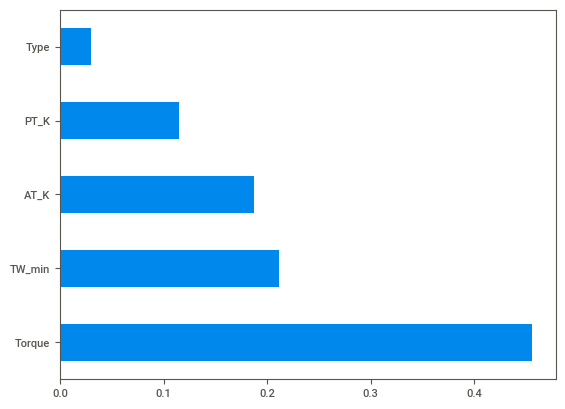

In [90]:
# plotting graph for better visualization
feat_imp = pd.Series(model.feature_importances_, index = X_res.columns)
feat_imp.nlargest(5).plot(kind = 'barh')
plt.show()

MODEL BUILDING


In [91]:
from sklearn.model_selection import train_test_split

# X is the feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
import time

from sklearn.metrics import accuracy_score,classification_report
classifier=[]
imported_as=[]

#LGBM
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
classifier.append('LightGBM')
imported_as.append('lgbm')

#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
classifier.append('Multi Layer Perceptron')
imported_as.append('mlp')

#Bagging
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
classifier.append('Bagging')
imported_as.append('bc')

#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
classifier.append('Gradient Boosting')
imported_as.append('gbc')

#ADA
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classifier.append('Ada Boost')
imported_as.append('ada')

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
classifier.append('XG Boost')
imported_as.append('xgb')

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')

#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

#Grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
classifier.append('SVM tuning grid')
imported_as.append('grid')

#STcaking
from sklearn.ensemble import StackingClassifier
estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr',SVC(random_state=42))]
stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
classifier.append('Stacked (RFR & SVM)')
imported_as.append('stc')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


In [93]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models

    def fit(self):
        model_acc = []
        model_time= []
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})

    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)

    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])

    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])

    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))

    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))

    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))

In [94]:
display(classifiers)

Classifier Imported as
0                 LightGBM        lgbm
1   Multi Layer Perceptron         mlp
2                  Bagging          bc
3        Gradient Boosting         gbc
4                Ada Boost         ada
5                 XG Boost         xgb
6      Logistic Regression          lr
7            Random Forest         rfc
8     k Nearest Neighbours         knn
9   Support Vector Machine         svc
10         SVM tuning grid        grid
11     Stacked (RFR & SVM)         stc

In [95]:
models_to_test = [bc,gbc,ada,rfc,mlp,lr,knn,stc]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    8000 non-null   int64  
 1   AT_K    8000 non-null   float64
 2   PT_K    8000 non-null   float64
 3   Torque  8000 non-null   float64
 4   TW_min  8000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 375.0 KB


In [96]:
classification = Modelling (X_train,y_train,X_test,y_test, models_to_test)
classification.fit()

BaggingClassifier() has been fit
GradientBoostingClassifier() has been fit
AdaBoostClassifier() has been fit
RandomForestClassifier() has been fit
MLPClassifier() has been fit
LogisticRegression() has been fit
KNeighborsClassifier(n_neighbors=1) has been fit
StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr', SVC(random_state=42))],
                   final_estimator=LogisticRegression()) has been fit


In [97]:
classification.results()

Models  Accuracy  Runtime (s)
0      RandomForestClassifier     97.85     1.819099
1          StackingClassifier     97.85     3.187974
2  GradientBoostingClassifier     97.70     3.360711
3          AdaBoostClassifier     97.65     1.167918
4           BaggingClassifier     97.55     0.526700
5               MLPClassifier     97.35    24.626668
6          LogisticRegression     97.10     0.070132
7        KNeighborsClassifier     96.45     0.178904

DATA PREP TOOL EDA


In [98]:
!pip install dataprep




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 39.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.8 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252721 sha256=96446a65e8ac23f28bfec046d424b9db3efc5f531196c8f92d0882afade00e1c
  Stored in directory: /root/

In [99]:
import pandas as pd
from dataprep.eda import create_report

The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



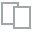
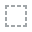
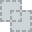
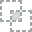
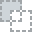
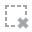
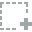
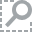
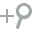
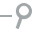
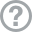
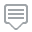
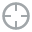
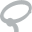
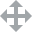
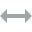
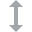
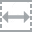
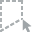
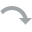
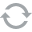
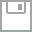
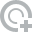
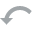
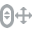
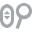
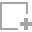
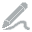
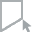
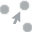
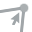
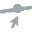

In [100]:
report = create_report(df)
report.show()


MODEL BUILDING


FOR LOGISTIC REGRESSION , RANDOM FOREST , DECISION TREES

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [106]:
X_train

Type      AT_K      PT_K    Torque    TW_min
9254     1 -0.852397 -0.610355 -0.896044  1.367599
1561     1 -0.902393 -1.082162  1.393618  0.456380
1670     1 -0.902393 -1.486567 -0.896044  1.351888
6087     2  0.447499  0.535460 -0.704398 -1.586009
6669     1  0.697480  0.333257 -0.613618  1.571838
...    ...       ...       ...       ...       ...
5734     1  1.147444  1.209468  1.635697  1.571838
5191     1  1.997377  2.153081  0.606862  0.314983
5390     0  1.397424  1.546473  0.727902  1.807498
860      0 -1.952310 -2.093175 -0.744744 -1.177531
7270     1  0.097527  0.265856 -1.430634 -1.146110

[8000 rows x 5 columns]

In [107]:
y_train

9254    0
1561    0
1670    0
6087    0
6669    0
       ..
5734    1
5191    0
5390    0
860     0
7270    0
Name: Machine failure, Length: 8000, dtype: int64

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    print(f"Model: {model_name}")
    print('Model performance for Training set')
    print(f"- Accuracy: {model_train_accuracy:.4f}")
    print(f"- F1 score: {model_train_f1:.4f}")
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall: {model_train_recall:.4f}")
    print(f"- Roc Auc Score: {model_train_rocauc_score:.4f}")

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')

    print('Model performance for Test set')
    print(f"- Accuracy: {model_test_accuracy:.4f}")
    print(f"- F1 score: {model_test_f1:.4f}")
    print(f"- Precision: {model_test_precision:.4f}")
    print()

Model: Logistic Regression
Model performance for Training set
- Accuracy: 0.9673
- F1 score: 0.9531
- Precision: 0.9665
- Recall: 0.9673
- Roc Auc Score: 0.5305
Model performance for Test set
- Accuracy: 0.9710
- F1 score: 0.9581
- Precision: 0.9718

Model: Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
Model performance for Test set
- Accuracy: 0.9665
- F1 score: 0.9674
- Precision: 0.9684

Model: Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
Model performance for Test set
- Accuracy: 0.9780
- F1 score: 0.9756
- Precision: 0.9751



HYPERPARAMETER TUNING FOR RANOM FOREEST USING GRIDSEARCH CV


In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],  # Try different numbers of trees in the forest
    'max_depth': [None, 10, 20],     # Try different maximum depths of the trees
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Model testing with the best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Model Evaluation for the best model
print('Train accuracy is       : ', accuracy_score(y_train, y_pred_train))
print('Test accuracy is        : ', accuracy_score(y_test, y_pred_test))
print('Classification report is:\n', classification_report(y_test, y_pred_test))


Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Train accuracy is       :  0.988875
Test accuracy is        :  0.979
Classification report is:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.77      0.44      0.56        61

    accuracy                           0.98      2000
   macro avg       0.88      0.72      0.78      2000
weighted avg       0.98      0.98      0.98      2000

